In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, shutil
from keras import models
from keras import layers
from sklearn.metrics import confusion_matrix, f1_score
np.random.seed(123)
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [2]:
# Set up data into train and test directories with folders of bobcat and not_bobcat
train_data_dir = '/Users/j.markdaniels/Downloads/final_proj_data/bobcat_cougar_data/train/'#348 bobcat, 340 not_bobcat
test_data_dir = '/Users/j.markdaniels/Downloads/final_proj_data/bobcat_cougar_data/test/'#348 bobcat, 340 not_bobcat

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_data_dir, 
        target_size=(128, 128), batch_size=340)

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_data_dir, 
        target_size=(128, 128), batch_size=340)

# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 685 images belonging to 2 classes.
Found 680 images belonging to 2 classes.


/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 85 bytes but only got 0. Skipping tag 33285
  " Skipping tag %s" % (size, len(data), tag))
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 93 bytes but only got 0. Skipping tag 33285
  " Skipping tag %s" % (size, len(data), tag))
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 141 bytes but only got 0. Skipping tag 37386
  " Skipping tag %s" % (size, len(data), tag))
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 149 bytes bu

In [3]:
# get all the data in the directory split/test, and reshape them
data_te = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        '/Users/j.markdaniels/Downloads/final_proj_data/bobcat_cougar_data/test/', 
        target_size=(224, 224), 
        batch_size = 340, 
        seed = 123)

Found 685 images belonging to 2 classes.


In [4]:
data_tr = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        '/Users/j.markdaniels/Downloads/final_proj_data/bobcat_cougar_data/train/', 
        target_size=(224, 224), 
        batch_size = 340, 
        seed = 123) 

Found 680 images belonging to 2 classes.


In [5]:
#split images and labels
images_tr, labels_tr = next(data_tr)

In [6]:
#split images and labels
images_te, labels_te = next(data_te)

In [7]:
images = np.concatenate((images_tr, images_te))

In [8]:
labels = np.concatenate((labels_tr[:,0], labels_te[:,0]))

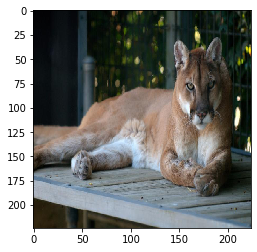

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(images[23])
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_model, X_test, y_model, y_test = train_test_split(images, labels, test_size=0.20, random_state=123)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.20, random_state=123)

In [12]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(64, (1, 1), activation='relu', input_shape=(224, 224,  3)))
cnn.add(layers.BatchNormalization())
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.BatchNormalization())
# 64 bias parameters
# 64 * (3 * 3 * 3) weight parametrs
# Output is 64*224*224
cnn.add(layers.MaxPooling2D((2, 2)))
#Output is 64*112*112
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224,  3)))
cnn.add(layers.BatchNormalization())
#32 bias parameters
#32 * (3*3*64)
#Output is 32*112*112 
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid'))

cnn.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
cnn1 = cnn.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=50,
                    validation_data=(X_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 435 samples, validate on 109 samples
Epoch 1/100
435/435 [==============================] - 55s 126ms/step - loss: 1.6194 - acc: 0.5931 - val_loss: 1.0366 - val_acc: 0.6055
Epoch 2/100
435/435 [==============================] - 50s 115ms/step - loss: 0.5977 - acc: 0.7678 - val_loss: 0.8167 - val_acc: 0.6514
Epoch 3/100
435/435 [==============================] - 48s 111ms/step - loss: 0.2881 - acc: 0.8897 - val_loss: 0.6718 - val_acc: 0.6972
Epoch 4/100
435/435 [==============================] - 49s 112ms/step - loss: 0.1797 - acc: 0.9310 - val_loss: 0.6264 - val_acc: 0.7523
Epoch 5/100
435/435 [==============================] - 48s 111ms/step - loss: 0.0945 - acc: 0.9724 - val_loss: 0.5536 - val_acc: 0.8165
Epoch 6/100
435/435 [==============================] - 49s 112ms/step - loss: 0.0672 - acc: 0.9701 - val_loss: 0.6355 - val_acc: 0.7706
Epoch 7/100
435/435 [==============================] - 50s 115ms/step - loss: 0.0341 - acc

Epoch 58/100
435/435 [==============================] - 50s 114ms/step - loss: 2.8529e-04 - acc: 1.0000 - val_loss: 0.7261 - val_acc: 0.7982
Epoch 59/100
435/435 [==============================] - 48s 111ms/step - loss: 2.6823e-04 - acc: 1.0000 - val_loss: 0.7240 - val_acc: 0.7982
Epoch 60/100
435/435 [==============================] - 48s 110ms/step - loss: 2.9202e-04 - acc: 1.0000 - val_loss: 0.7299 - val_acc: 0.7982
Epoch 61/100
435/435 [==============================] - 50s 116ms/step - loss: 2.8689e-04 - acc: 1.0000 - val_loss: 0.7251 - val_acc: 0.7982
Epoch 62/100
435/435 [==============================] - 49s 113ms/step - loss: 2.4617e-04 - acc: 1.0000 - val_loss: 0.7221 - val_acc: 0.7982
Epoch 63/100
435/435 [==============================] - 51s 117ms/step - loss: 2.6612e-04 - acc: 1.0000 - val_loss: 0.7185 - val_acc: 0.7982
Epoch 64/100
435/435 [==============================] - 51s 117ms/step - loss: 2.7262e-04 - acc: 1.0000 - val_loss: 0.7123 - val_acc: 0.8073
Epoch 65/100


In [14]:
print(cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      256       
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 110, 110, 64)      36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 110, 110, 64)      256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 53, 53, 32)        18464     
__________

# Load Model

In [15]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model


cnn.load_weights('cnn_first_draft.h5')
# load model
# model = load_model('cnn_first_draft.h5')
# summarize model.
cnn.summary()
# load dataset


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 64)      256       
_________________________________________________________________
batch_normalization_2 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 110, 110, 64)      36928     
_________________________________________________________________
batch_normalization_3 (Batch (None, 110, 110, 64)      256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 53, 53, 32)        18464     
__________

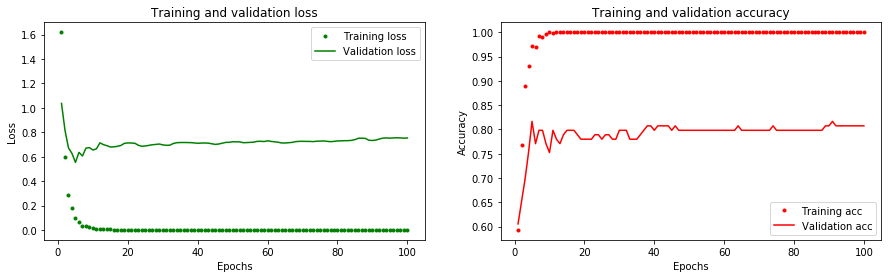

In [16]:
hist_cnn = cnn1.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['acc'] 
val_acc_values = hist_cnn['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
results_train = cnn.evaluate(X_train, y_train)
results_test = cnn.evaluate(X_test, y_test)
print(results_train, results_test)

136/136 [==============================] - 6s 45ms/step
[8.179726338030065e-05, 1.0] [0.6978172114228501, 0.8308823529411765]


In [20]:
predictions_transfer = cnn.predict(X_test)
predictions_transfer = np.around(predictions_transfer)

In [21]:
f1_score(y_test, predictions_transfer)

0.8391608391608392

In [22]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[53 13]
 [10 60]]


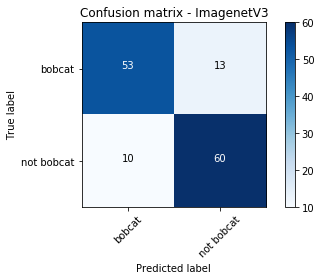

In [23]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, predictions_transfer), classes=['bobcat', 'not bobcat'], normalize=False,
                      title='Confusion matrix - ImagenetV3')

In [24]:
cnn.save('cnn_first_draft.h5')